# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November 5th, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

In the exercises below, I describe the exercises in a general way. Drawing in the right parts of the exercises is part of the assignment. (That way we're helping you get a little bit more ready for the Final Project, where you have to decide what information to include in your report and analysis). 


# Part 1: Genres and communities and plotting 

The questions below are based on Lecture 7, part 2.

* Write about genres and modularity.
* Detect the communities, discuss the value of modularity in comparison to the genres.
* Calculate the matrix $D$ and discuss your findings.
* Plot the communities and comment on your results.

# Part 2: TF-IDF to understand genres and communities 

The questions below  are based on Lecture 7, part 2 and 3.

* Explain the concept of TF-IDF in your own words and how it can help you understand the genres and communities.
* Calculate and visualize TF-IDF for the genres and communities.
* Use the matrix $D$ (Lecture 7, part 2) to dicusss the difference between the word-clouds between genres and communities.

# Part 3: Sentiment of the artists and communities

The questions below are based on Lecture 8

* Calculate the sentiment of the Artists pages (OK to work with the sub-network of artists-with-genre) and describe your findings using stats and visualization, inspired by the first exercise of week 8.
* Discuss the sentiment of the largest communities. Do the findings using TF-IDF during Lecture 7 help you understand your results?

/tmp/ipykernel_15040/450248239.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sentiments, x='Sentiment', y='Genre', palette="viridis")


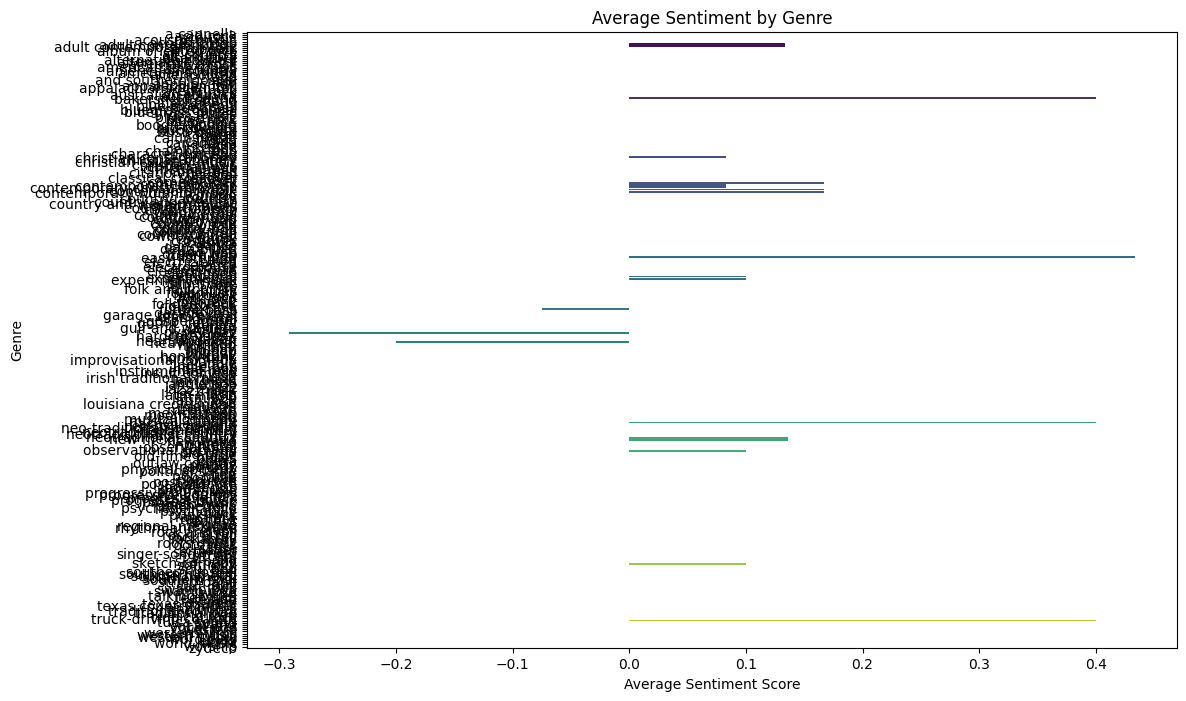

,Sentiment
count,283.000000
mean,0.009739
std,0.059207
min,-0.291667
25%,0.000000
50%,0.000000
75%,0.000000
max,0.433333


In [ ]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Load the genres data from a txt file assuming the file follows a JSON-like structure
file_path = 'genres.txt'

# Reading and loading the JSON data
with open(file_path, 'r') as file:
    artist_data = json.load(file)  # Directly load into a dictionary

# Load sentiment data from a .txt file with tab as the delimiter
file_path = 'Data_Set_S1.txt'  # Change this to your actual file path
sentiment_df = pd.read_csv(file_path, sep='\t', skiprows=2)  # Skip the first two lines

# Create a dictionary for sentiment lookup
sentiment_dict = dict(zip(sentiment_df['word'], sentiment_df['happiness_rank'].astype(int)))

# Calculate sentiment scores for each artist based on genres
artist_sentiment_scores = {}
for artist, genres in artist_data.items():
    scores = []
    for genre in genres:
        # Check if the genre is in the sentiment dictionary
        if genre in sentiment_dict:
            scores.append(sentiment_dict[genre])
    
    # Calculate average score if scores are available
    if scores:
        average_score = np.mean(scores)
    else:
        average_score = 0  # Or any default value

    artist_sentiment_scores[artist] = average_score

# Create a network graph
G = nx.Graph()

# Add artist nodes with sentiment scores
for artist, score in artist_sentiment_scores.items():
    G.add_node(artist, score=score)

# Add edges between artists and genres
for artist, genres in artist_data.items():
    for genre in genres:
        G.add_node(genre)
        G.add_edge(artist, genre)

# Draw the network
plt.figure(figsize=(12, 8))  # Increase figure size
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Normalize node sizes based on sentiment scores
max_score = max(artist_sentiment_scores.values(), default=1)
node_sizes = [G.nodes[node]['score'] / max_score * 800 for node in G.nodes if node in artist_sentiment_scores]

# Draw artist nodes with color gradient
artist_nodes = [node for node in G.nodes if node in artist_sentiment_scores]
genre_nodes = [node for node in G.nodes if node not in artist_sentiment_scores]

# Create color map for artist nodes based on sentiment scores
colors = [G.nodes[node]['score'] / max_score for node in artist_nodes]  # Normalize scores for color mapping
norm = Normalize(vmin=0, vmax=1)  # Normalization for color mapping

# Draw nodes
sc = nx.draw_networkx_nodes(G, pos, nodelist=artist_nodes, node_color=colors, cmap=plt.cm.Blues, 
                             node_size=node_sizes, alpha=0.7, label="Artists")
nx.draw_networkx_nodes(G, pos, nodelist=genre_nodes, node_color='lightcoral', node_size=100, alpha=0.7, label="Genres")

# Draw edges with improved transparency
nx.draw_networkx_edges(G, pos, alpha=0.4, width=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", font_color='black')

# Add a colorbar
cbar = plt.colorbar(sc, label='Sentiment Score')  # Colorbar for sentiment scores

# Additional plot settings
plt.axis('off')  # Hide the axis
plt.legend()  # Show legend
plt.title("Artist Genre Sentiment Network", fontsize=16)
plt.show()
